<a href="https://colab.research.google.com/github/Chaitra-B-V/BinaryClassificationUsingPycaret/blob/main/BinaryClassificationUsingPycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [1]:
from google.colab import files
uploaded = files.upload()


Saving new_train.csv to new_train (1).csv


In [2]:
import io
import pandas as pd
dataset = pd.read_csv(io.BytesIO(uploaded['new_train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [34]:
dataset.shape
dataset.rename(columns={'housing': 'HouseLoan','loan':'PersonalLoan'})

,age,job,marital,education,default,HouseLoan,PersonalLoan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In order to demonstrate the predict_model() function on unseen data, a sample of 1200 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1200 records are not available at the time when the machine learning experiment was performed.

In [35]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (31302, 16)
Unseen Data For Predictions: (1648, 16)


Setting Up Pycaret Env

In [36]:
from pycaret.classification import *

In [37]:
exp_clf101 = setup(data = data, target = 'y', session_id=123) 

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(31302, 16)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [38]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9109,0.9299,0.4765,0.6391,0.5455,0.4973,0.5041,0.379
gbc,Gradient Boosting Classifier,0.9095,0.9255,0.4282,0.6475,0.5149,0.4673,0.4798,3.039
lr,Logistic Regression,0.9065,0.9125,0.3600,0.6544,0.4639,0.4174,0.4402,2.994
lda,Linear Discriminant Analysis,0.9059,0.9140,0.4481,0.6117,0.5169,0.4662,0.4733,0.284
rf,Random Forest Classifier,0.9053,0.9171,0.3604,0.6416,0.4611,0.4137,0.4346,2.551
ada,Ada Boost Classifier,0.9053,0.9138,0.3876,0.6287,0.4790,0.4301,0.4457,1.059
ridge,Ridge Classifier,0.9036,0.0000,0.2845,0.6682,0.3983,0.3551,0.3940,0.057
knn,K Neighbors Classifier,0.8978,0.8063,0.3754,0.5693,0.4523,0.3985,0.4091,0.977
et,Extra Trees Classifier,0.8958,0.8887,0.2959,0.5720,0.3893,0.3386,0.3610,3.072
dummy,Dummy Classifier,0.8875,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [39]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [40]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9078,0.9267,0.4494,0.6271,0.5236,0.4741,0.4822
1,0.9092,0.9279,0.4959,0.6193,0.5508,0.5010,0.5048
2,0.9092,0.9314,0.4756,0.6257,0.5404,0.4911,0.4967
3,0.9064,0.9274,0.4553,0.6120,0.5221,0.4715,0.4779
4,0.9169,0.9329,0.5366,0.6600,0.5919,0.5462,0.5499
5,0.9119,0.9329,0.4756,0.6464,0.5480,0.5005,0.5077
6,0.9115,0.9296,0.4472,0.6548,0.5314,0.4844,0.4952
7,0.9124,0.9230,0.4899,0.6471,0.5576,0.5100,0.5161
8,0.9092,0.9342,0.4332,0.6446,0.5182,0.4701,0.4815


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [42]:
#trained model object is stored in the variable 'lightgbm'. 
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
!pip install gradio
#create_app(lightgbm)

In [44]:
create_app(lightgbm)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as        age           job   marital            education  default  housing  \
0       33    technician    single  professional.course       no      yes   
1       40    management   married    university.degree       no      yes   
2       44   blue-collar  divorced             basic.4y  unknown      yes   
3       57    management  divorced    university.degree       no  unknown   
4       50    management   married    university.degree       no      yes   
...    ...           ...       ...                  ...      ...      ...   
31297   36    technician   married             basic.9y  unknown      yes   
31298   52        admin.   married    university.degree       no      yes   
31299   50   blue-collar   married             basic.4y       no      yes   
31300   39  entrepreneur   married    university.degree  unknown      yes   
3

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://19850.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f9e83322e50>,
 'http://127.0.0.1:7861/',
 'https://19850.gradio.app')

In [45]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9092,0.9221,0.4291,0.6463,0.5158,0.4680,0.4799
1,0.9073,0.9222,0.4472,0.6215,0.5201,0.4703,0.4781
2,0.9105,0.9278,0.4878,0.6316,0.5505,0.5017,0.5069
3,0.9051,0.9242,0.4390,0.6067,0.5094,0.4584,0.4657
4,0.9156,0.9323,0.4919,0.6685,0.5667,0.5212,0.5287
5,0.9078,0.9258,0.4431,0.6264,0.5190,0.4697,0.4783
6,0.9115,0.9232,0.4593,0.6494,0.5381,0.4907,0.4997
7,0.9110,0.9170,0.4615,0.6477,0.5390,0.4913,0.4999
8,0.9073,0.9322,0.4049,0.6410,0.4963,0.4481,0.4625


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


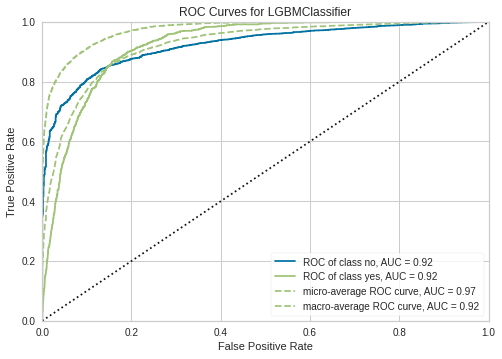

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
plot_model(tuned_lightgbm, plot = 'auc')

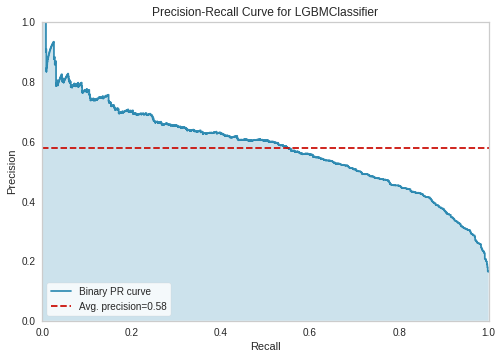

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(tuned_lightgbm, plot = 'pr')

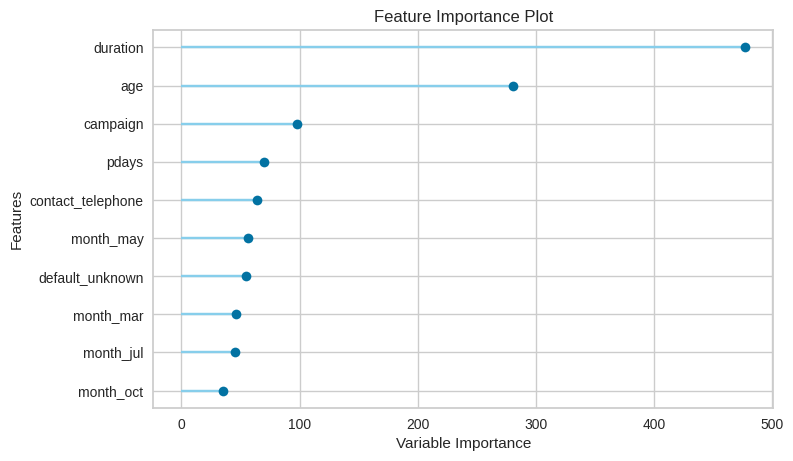

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
plot_model(tuned_lightgbm, plot='feature')

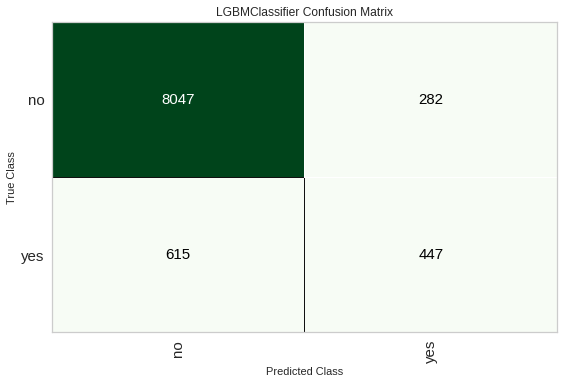

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [49]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [50]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [51]:
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9045,0.9229,0.4209,0.6132,0.4992,0.4484,0.4581


In [52]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
      

In [53]:
predict_model(final_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9097,0.9314,0.4539,0.6427,0.532,0.4837,0.4926


In [54]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.932,0,0,0,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Label,Score
0,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no,no,0.8815
1,23,admin.,married,high.school,no,no,no,cellular,apr,mon,297,4,999,0,nonexistent,no,no,0.7070
2,56,services,divorced,high.school,unknown,no,no,telephone,may,mon,154,1,999,0,nonexistent,no,no,0.9968
3,21,blue-collar,single,basic.9y,no,no,no,cellular,jul,wed,219,1,999,0,nonexistent,no,no,0.9290
4,52,technician,divorced,professional.course,unknown,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,no,no,0.9995


In [55]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['y'], unseen_predictions['Label'], metric = 'Accuracy')

0.9084

In [56]:
save_model(final_lightgbm,'BinaryClassificationUsingPycaret')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=BinaryClassificationUsingPycaret, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.05,
                                 max_depth=-1, min_child_samples=96,
                                 min_child_weight=

In [57]:
saved_final_lightgbm = load_model('BinaryClassificationUsingPycaret')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=BinaryClassificationUsingPycaret, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [58]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_sampl

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.932,0,0,0,0,0


In [59]:
from pycaret.utils import check_metric
check_metric(new_prediction['y'], new_prediction['Label'], metric = 'Accuracy')

0.9084